In [2]:
# Import necessary libraries
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

# File paths
#W1 is generated using the WHALES weights from the Montecarlo simulation
#W2 is generated using the theoretical explanations from Fabrice: 


file1 = "../whales/test_files/output/S6A_P4_1B_LR______20220223T111610_20220223T121223_20230310T040333_3373_047_172_086_EUM__REP_NT_F08.SEN6.measurement.nc"
file2 = "../whales/test_files/output/w1_S6A_P4_1B_LR______20220223T111610_20220223T121223_20230310T040333_3373_047_172_086_EUM__REP_NT_F08.SEN6.measurement.nc"

# Function to print variable names in a NetCDF file
def print_variable_names(filepath):
    with netCDF4.Dataset(filepath, mode='r') as nc_file:
        print(f"Variables in file: {filepath}")
        for var_name in nc_file.variables:
            print(var_name)


# Print variable names for the second file (optional)
print_variable_names(file2)


Variables in file: ../whales/test_files/output/w1_S6A_P4_1B_LR______20220223T111610_20220223T121223_20230310T040333_3373_047_172_086_EUM__REP_NT_F08.SEN6.measurement.nc
time_20hz
lat_20hz
lon_20hz
swh_WHALES_20hz
swh_WHALES_instr_corr_20hz
sigma0_WHALES_20hz
range_WHALES_20hz
epoch_WHALES_20hz
swh_WHALES_qual_20hz
startgate_WHALES
endgate_WHALES
finalgate_WHALES
scale_WHALES
noise_WHALES


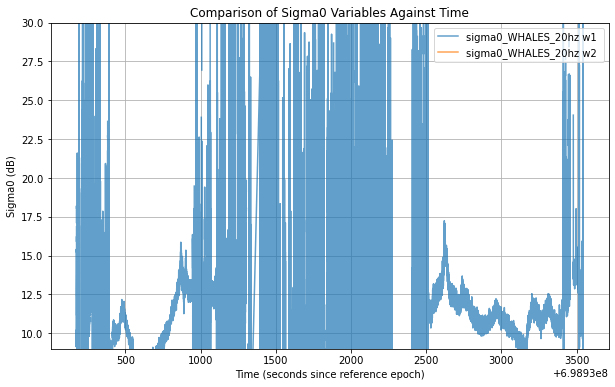

In [3]:
# Import necessary libraries
import netCDF4
import numpy as np
import matplotlib.pyplot as plt


# Read data from the first file
with netCDF4.Dataset(file1, mode='r') as nc1:
    time1 = nc1.variables['time_20hz'][:]
    sig0_1 = nc1.variables['sigma0_WHALES_20hz'][:]
    

# Read data from the second file
with netCDF4.Dataset(file2, mode='r') as nc2:
    time2 = nc2.variables['time_20hz'][:]
    sig0_2 = nc2.variables['sigma0_WHALES_20hz'][:]

# Reshape the sigma0 variables from (5981, 20) to (5981*20,)
sig0_1_flat = sig0_1.reshape(-1)
sig0_2_flat = sig0_2.reshape(-1)

# Reshape the time variables to match the flattened sigma0 arrays
time1_flat = time1.reshape(-1)
time2_flat = time2.reshape(-1)

# Slice the data to restrict the x-axis to indices from 7000 to 7200
index_range = slice(0, np.size(time1_flat))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time1_flat[index_range], sig0_1_flat[index_range], label="sigma0_WHALES_20hz w1", alpha=0.7)
plt.plot(time2_flat[index_range], sig0_2_flat[index_range], label="sigma0_WHALES_20hz w2 ", alpha=0.7)

# Set axis limits
plt.ylim(9, 30)  # Restrict y-axis to 10 to 20

# Add labels and legend
plt.xlabel("Time (seconds since reference epoch)")
plt.ylabel("Sigma0 (dB)")
plt.title("Comparison of Sigma0 Variables Against Time")
plt.legend()
plt.grid()
plt.show()

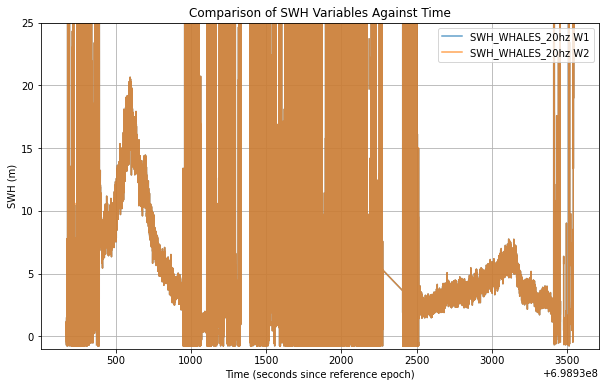

In [4]:
# Import necessary libraries
import netCDF4
import numpy as np
import matplotlib.pyplot as plt


# Read data from the first file
with netCDF4.Dataset(file1, mode='r') as nc1:
    time1 = nc1.variables['time_20hz'][:]
    sig0_1 = nc1.variables['swh_WHALES_20hz'][:]

# Read data from the second file
with netCDF4.Dataset(file2, mode='r') as nc2:
    time2 = nc2.variables['time_20hz'][:]
    sig0_2 = nc2.variables['swh_WHALES_20hz'][:]

# Reshape the sigma0 variables from (5981, 20) to (5981*20,)
sig0_1_flat = sig0_1.reshape(-1)
sig0_2_flat = sig0_2.reshape(-1)

# Reshape the time variables to match the flattened sigma0 arrays
time1_flat = time1.reshape(-1)
time2_flat = time2.reshape(-1)

# Slice the data to restrict the x-axis to indices from 7000 to 7200
index_range = slice(0, np.size(time1_flat))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time1_flat[index_range], sig0_1_flat[index_range], label="SWH_WHALES_20hz W1", alpha=0.7)
plt.plot(time2_flat[index_range], sig0_2_flat[index_range], label="SWH_WHALES_20hz W2", alpha=0.7)

# Set axis limits
plt.ylim(-1, 25)  # Restrict y-axis to 10 to 20

# Add labels and legend
plt.xlabel("Time (seconds since reference epoch)")
plt.ylabel("SWH (m)")
plt.title("Comparison of SWH Variables Against Time")
plt.legend()
plt.grid()
plt.show()


In [5]:
np.nanmedian(sig0_1_flat[index_range]-sig0_2_flat[index_range])

/home/passaro/miniconda3/envs/machine_learning_altimetry_validation/lib/python3.6/site-packages/numpy/lib/function_base.py:3550: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  part.partition(kth)


0.0

ValueError: Contour levels must be increasing

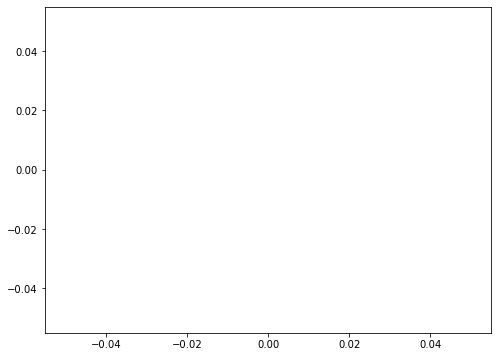

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Your existing data
x = sig0_1_flat[index_range]
y = sig0_1_flat[index_range] - sig0_2_flat[index_range]

# Remove NaN values
valid_mask = ~np.isnan(x) & ~np.isnan(y) & (y >= -1) & (y <= 1)
x_clean = x[valid_mask]
y_clean = y[valid_mask]

# Compute linear fit (y = mx + b)
m, b = np.polyfit(x_clean, y_clean, 1)  # 1st-degree polynomial (linear)

# Create the density plot
plt.figure(figsize=(8, 6))

# Check Seaborn version
import seaborn as sns
if int(sns.__version__.split('.')[0]) >= 0 and int(sns.__version__.split('.')[1]) >= 11:
    sns.kdeplot(x=x_clean, y=y_clean, fill=True, cmap="viridis", levels=50, thresh=0)
else:
    sns.kdeplot(x_clean, y_clean, cmap="viridis", shade=True)
    
# Plot the linear fit line
x_fit = np.linspace(min(x_clean), max(x_clean), 100)  # Generate x values for the fit line
y_fit = m * x_fit + b  # Compute y values using the linear fit
plt.plot(x_fit, y_fit, color="red", linestyle="--", linewidth=2, label=f"Fit: y = {m:.2f}x + {b:.2f}")


plt.ylim(-0.25, 0.25)
plt.xlim(-1, 15)
plt.xlabel("SWH w-1")
plt.ylabel("Difference (SWH w-1 - SWH w-2)")
plt.title("Density Plot (NaNs Removed)")
plt.show()
